In [1]:
# importing librairies

import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
# from keras.models import Sequential 
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
# from keras.layers import Dropout, Flatten, Dense  
from tensorflow.keras import applications
# from tensorflow.keras.utils.np_utils import to_categorical  
# import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
# %matplotlib inline
import math  
import datetime
import time

In [2]:
os.listdir('../FYP')

['.ipynb_checkpoints',
 'bottleneck_fc_model.h5',
 'bottleneck_features_train.npy',
 'CNN.ipynb',
 'dataset',
 'FYP_ODIR_CNN.ipynb',
 'Glycauma.zip',
 'Normal.zip',
 'ODIR-5K_Training_Annotations(Updated)_V2.xlsx',
 'ODIR.ipynb',
 'ODIR1.ipynb',
 'ODIR_CNN_new.ipynb',
 'output',
 'testing_image',
 'training_image',
 'training_image.zip',
 'train_csv.csv',
 'train_x.pickle',
 'train_y.pickle',
 'Untitled1.ipynb',
 'x.pickle',
 'y.pickle']

In [3]:
print(len(os.listdir('../FYP/training_image')))
print(len(os.listdir('../FYP/testing_image')))
original_dataset_train_dir = '../FYP/training_image'
original_dataset_test_dir = '../FYP/testing_image'

7000
1000


In [4]:
df_data = pd.read_csv('../FYP/train_csv.csv')


print(df_data.shape)

(3500, 15)


In [5]:
df_data['M'].value_counts()
df_data.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot?moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [6]:
# Separate the whole images into different categories and save in category of an array

# Path of images
IMAGE_PATH = '../FYP/train_image/' 
# categories = ["N","D","G","C","A","H","M","O"]

# Inialiaze the categories og train
NORMAL_train = []
DIABETES_train = []
GLYCOMA_train = []
CATARACT_train = []
AMD_train = []
HYPERTENSION_train = []
MYOPIA_train = []
OTHER_train = []


# Inialiaze the categories og test
NORMAL_test = []
DIABETES_test = []
GLYCOMA_test = []
CATARACT_test = []
AMD_test = []
HYPERTENSION_test = []
MYOPIA_test = []
OTHER_test = []

# Data load from dataset
normal_fundus_from_dataset = df_data["N"]
diabetes_fundus_from_dataset = df_data["D"]
glycoma_fundus_from_dataset = df_data["G"]
cataract_fundus_from_dataset = df_data["C"]
amd_fundus_from_dataset = df_data["A"]
hypertension_fundus_from_dataset = df_data["H"]
myopia_fundus_from_dataset = df_data["M"]
other_fundus_from_dataset = df_data["O"]


left_image = df_data["Left-Fundus"]
right_image = df_data["Right-Fundus"]
# print(myopia_fundus)
print(len(df_data))
for i in range(0,len(df_data)):
#     print(myopia_fundus[i])
    if normal_fundus_from_dataset[i] == 1:
        NORMAL_train.append(left_image[i])
        NORMAL_train.append(right_image[i])
    if diabetes_fundus_from_dataset[i] == 1:
        DIABETES_train.append(left_image[i])
        DIABETES_train.append(right_image[i])
    
    if glycoma_fundus_from_dataset[i] == 1:
        GLYCOMA_train.append(left_image[i])
        GLYCOMA_train.append(right_image[i])
    
    if cataract_fundus_from_dataset[i] == 1:
        CATARACT_train.append(left_image[i])
        CATARACT_train.append(right_image[i])
    
    if amd_fundus_from_dataset[i] == 1:
        AMD_train.append(left_image[i])
        AMD_train.append(right_image[i])
    
    if hypertension_fundus_from_dataset[i] == 1:
        HYPERTENSION_train.append(left_image[i])
        HYPERTENSION_test.append(right_image[i])
    
    if myopia_fundus_from_dataset[i] == 1:
        MYOPIA_train.append(left_image[i])
        MYOPIA_train.append(right_image[i])
    
    if other_fundus_from_dataset[i] == 1:
        OTHER_train.append(left_image[i])
        OTHER_train.append(right_image[i])
    

ee = len(NORMAL_train)+len(MYOPIA_train)+len(CATARACT_train)+len(HYPERTENSION_train)+len(OTHER_train)+len(GLYCOMA_train)+len(AMD_train)+len(DIABETES_train)
print(ee)
# print(len(CATARACT_train))
#     if myopia_fundus[i] == 1:
#         myopia.append(left_image[i])
#         myopia.append(right_image[i])
#     elif cataract_fundus[i] == 1:
#         cataract.append(left_image[i])
#         cataract.append(right_image[i])
#     elif normal_fundus[i] == 1:
#         normal.append(left_image[i])
#         normal.append(right_image[i])
# # dra
# for i in len(df_data):
#     if myopia_fundus=="1":
#         print("helo")
# comparison_column = np.where(df["col1"] == df["col2"], True, False)

# path1 = os.path.join(IMAGE_PATH,left_fundus[0])
# for left in left_fundus:
#     path = os.path.join(IMAGE_PATH,left)
#     print(path)
    



3500
8127


# Create directory and Separte the images 

In [ ]:
base_dir = '../FYP/dataset'
os.mkdir(base_dir)


In [ ]:
train_dir = os.path.join(base_dir, 'training_image')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'testing_image')
os.mkdir(test_dir)

In [ ]:
# Train Directory
train_cataract_dir = os.path.join(train_dir, 'Cataract')
os.mkdir(train_cataract_dir)

train_myopia_dir = os.path.join(train_dir, 'Myopia')
os.mkdir(train_myopia_dir)

train_normal_dir = os.path.join(train_dir, 'Normal')
os.mkdir(train_normal_dir)

train_diabetes_dir = os.path.join(train_dir, 'Diabetes')
os.mkdir(train_diabetes_dir)

train_hypertensio_dir = os.path.join(train_dir, 'Hypertension')
os.mkdir(train_hypertensio_dir)

train_glycoma_dir = os.path.join(train_dir, 'Glycauma')
os.mkdir(train_glycoma_dir)

train_other_dir = os.path.join(train_dir, 'Other')
os.mkdir(train_other_dir)
# Testing Directory
# test_cataract_dir = os.path.join(test_dir, 'Cataract')
# os.mkdir(test_cataract_dir)

# test_myopia_dir = os.path.join(test_dir, 'Myopia')
# os.mkdir(test_myopia_dir)

# test_normal_dir = os.path.join(test_dir, 'Normal')
# os.mkdir(test_normal_dir)

# test_diabetes_dir = os.path.join(test_dir, 'Diabetes')
# os.mkdir(test_diabetes_dir)

# test_hypertensio_dir = os.path.join(test_dir, 'Hypertension')
# os.mkdir(test_hypertensio_dir)

# test_glycoma_dir = os.path.join(test_dir, 'Glycauma')
# os.mkdir(test_glycoma_dir)

# test_other_dir = os.path.join(test_dir, 'Other')
# os.mkdir(test_other_dir)


In [ ]:

    
for cataract in CATARACT_train:
    src = os.path.join(original_dataset_train_dir, cataract)
    dst = os.path.join(train_cataract_dir, cataract)
    shutil.copyfile(src, dst)
# for cataract in CATARACT_test:
#     src = os.path.join(original_dataset_train_dir, cataract)
#     dst = os.path.join(test_cataract_dir, cataract)
#     shutil.copyfile(src, dst)


In [ ]:
for myopia in MYOPIA_train:
    src = os.path.join(original_dataset_train_dir, myopia)
    dst = os.path.join(train_myopia_dir, myopia)
    shutil.copyfile(src, dst)
# for myopia in MYOPIA_test:
#     src = os.path.join(original_dataset_train_dir, myopia)
#     dst = os.path.join(test_myopia_dir, myopia)
#     shutil.copyfile(src, dst)


In [ ]:
for normal in NORMAL_train:
    src = os.path.join(original_dataset_train_dir, normal)
    dst = os.path.join(train_normal_dir, normal)
    shutil.copyfile(src, dst)
# for normal in NORMAL_test:
#     src = os.path.join(original_dataset_train_dir, normal)
#     dst = os.path.join(test_normal_dir, normal)
#     shutil.copyfile(src, dst)


In [ ]:
for diabetes in DIABETES_train:
    src = os.path.join(original_dataset_train_dir, diabetes)
    dst = os.path.join(train_diabetes_dir, diabetes)
    shutil.copyfile(src, dst)
# for diabetes in DIABETES_test:
#     src = os.path.join(original_dataset_train_dir, diabetes)
#     dst = os.path.join(test_diabetes_dir, diabetes)
#     shutil.copyfile(src, dst)

In [ ]:
for glycauma in GLYCOMA_train:
    src = os.path.join(original_dataset_train_dir, glycauma)
    dst = os.path.join(train_glycoma_dir, glycauma)
    shutil.copyfile(src, dst)
# for glycauma in GLYCOMA_test:
#     src = os.path.join(original_dataset_train_dir, glycauma)
#     dst = os.path.join(test_glycoma_dir, glycauma)
#     shutil.copyfile(src, dst)

In [ ]:
for hypertension in HYPERTENSION_train:
    src = os.path.join(original_dataset_train_dir, hypertension)
    dst = os.path.join(train_hypertensio_dir, hypertension)
    shutil.copyfile(src, dst)
# for hypertension in HYPERTENSION_test:
#     src = os.path.join(original_dataset_train_dir, hypertension)
#     dst = os.path.join(test_hypertensio_dir, hypertension)
#     shutil.copyfile(src, dst)

In [ ]:
for other in OTHER_train:
    src = os.path.join(original_dataset_train_dir, other)
    dst = os.path.join(train_other_dir, other)
    shutil.copyfile(src, dst)
# for other in OTHER_test:
#     src = os.path.join(original_dataset_train_dir, other)
#     dst = os.path.join(test_other_dir, other)
#     shutil.copyfile(src, dst)

In [ ]:
train_amd_dir = os.path.join(train_dir, 'AMD')
os.mkdir(train_amd_dir)

In [ ]:
for amd in AMD_train:
    src = os.path.join(original_dataset_train_dir, amd)
    dst = os.path.join(train_amd_dir, amd)
    shutil.copyfile(src, dst)

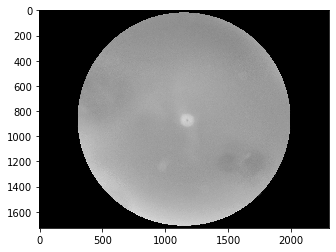

In [7]:
class_names = ['Cataract', 'Diabetes', 'Glycauma', 'Hypertension', 'Myopia',
               'Normal', 'Other','AMD']

DATA_DIR = "../FYP/dataset/training_image"

for categry in class_names:
    path = os.path.join(DATA_DIR,categry)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap ="gray")
        plt.show()
        break
    break


In [8]:
print(img_array.shape)

(1728, 2304)


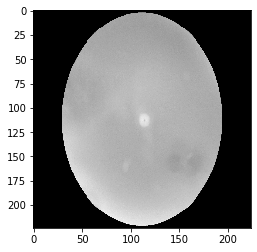

In [9]:
# IMG_SIZE = 50
# new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
# plt.imshow(new_array,cmap = 'gray')
# plt.show()

IMG_SIZE = 224 #224 x 224 image size set

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
# Training data
training_data = []
def create_training_data():
    for categry in class_names:
        path = os.path.join(DATA_DIR,categry)
        class_num = class_names.index(categry)
        for image in os.listdir(path):
#         for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

In [ ]:
x=[]
y=[]

In [ ]:
for features,label in training_data:
    x.append(features)
    y.append(label)

# print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x[0])

# for feature,label in training_data:
#     x.append(feature)
#     y.append(label)
# x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [2]:
import pickle

In [3]:
pickle_in = open("/content/drive/My Drive/Colab Notebooks/train_x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/Colab Notebooks/train_y.pickle","rb")
y = pickle.load(pickle_in)

# Training Model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x = x/255.0

y=np.array(y)
model = Sequential()

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(112, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Activation('softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=20, validation_split=0.1)


Epoch 1/20
229/229 [==============================] - 91s 400ms/step - loss: 1.7362 - accuracy: 0.2976 - val_loss: 1.6188 - val_accuracy: 0.3555
Epoch 2/20
229/229 [==============================] - 88s 385ms/step - loss: 1.6658 - accuracy: 0.3279 - val_loss: 1.5748 - val_accuracy: 0.3456
Epoch 3/20
229/229 [==============================] - 88s 384ms/step - loss: 1.6351 - accuracy: 0.3428 - val_loss: 1.5405 - val_accuracy: 0.3506
Epoch 4/20
229/229 [==============================] - 88s 383ms/step - loss: 1.6096 - accuracy: 0.3485 - val_loss: 1.5631 - val_accuracy: 0.3579
Epoch 5/20
229/229 [==============================] - 88s 383ms/step - loss: 1.5816 - accuracy: 0.3525 - val_loss: 1.5228 - val_accuracy: 0.3567
Epoch 6/20
229/229 [==============================] - 88s 383ms/step - loss: 1.5574 - accuracy: 0.3642 - val_loss: 1.5172 - val_accuracy: 0.3911
Epoch 7/20
229/229 [==============================] - 88s 383ms/step - loss: 1.5436 - accuracy: 0.3716 - val_loss: 1.5041 - val_ac

In [10]:

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])



In [11]:
# model.fit(x, y, batch_size=32, epochs=10, validation_split=0.1)